In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,log_loss
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer

In [ ]:
# Load the datasets
data_train = pd.read_csv('modified_churn_data (80).csv')
data_test = pd.read_csv('modified_churn_data (20).csv')


**# Data preprocessing**

In [ ]:
print(data_train.info())
print(data_train.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   int64  
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   int64  
 4   Voice mail plan         2666 non-null   int64  
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

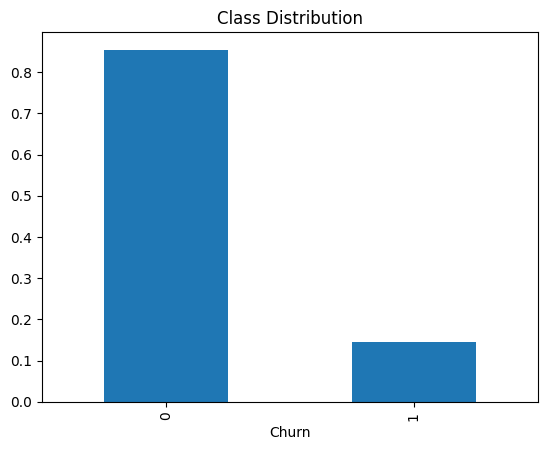

In [ ]:
#shows the distrubution
data_train['Churn'].value_counts(normalize=True).plot(kind='bar', title='Class Distribution');


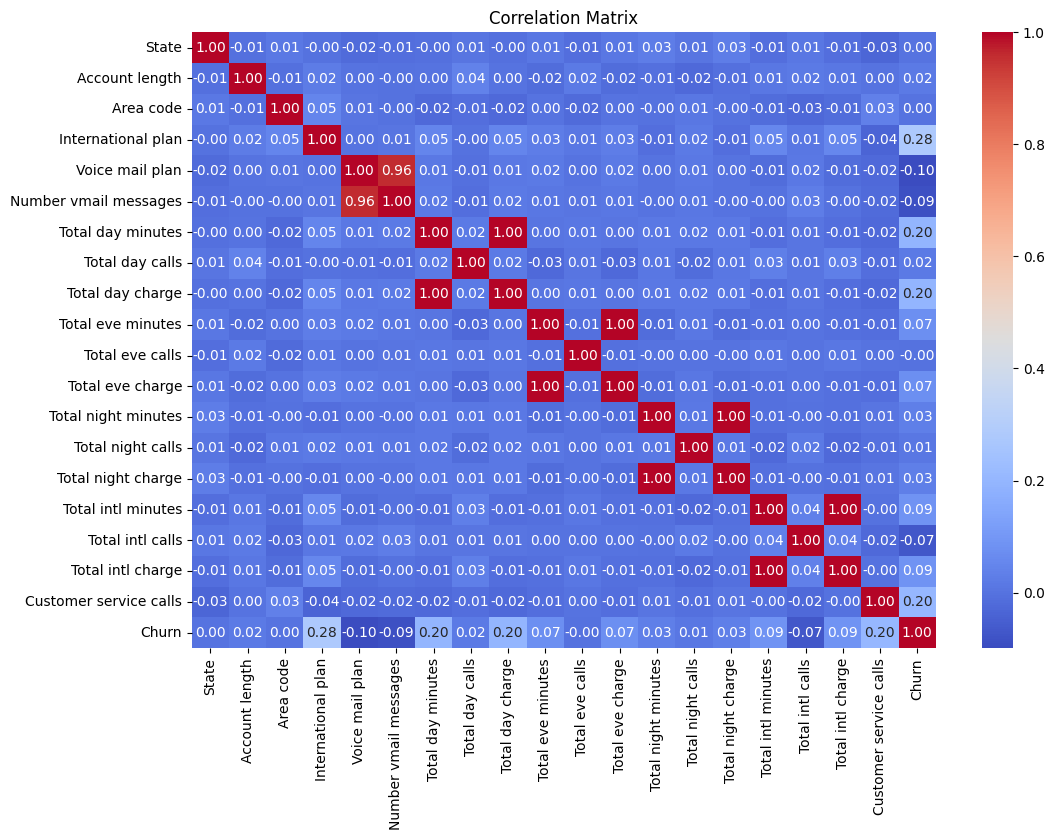

In [ ]:
#Analyze Relationships Between Features
plt.figure(figsize=(12, 8))
sns.heatmap(data_train.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Drop redundant
data_train=data_train.drop(columns=['Total day charge', 'Total eve charge',
                                      'Total night charge', 'Total intl charge',
                                      'Number vmail messages'])


In [ ]:
#Addressing Class Imbalance
from imblearn.over_sampling import SMOTE

X =data_train.drop(columns=['Churn'])
y =data_train['Churn']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [ ]:
# Handle missing values, encode categorical variables
data_train = data_train.dropna()
data_test = data_test.dropna()

In [ ]:
# Encode categorical features
data_train = pd.get_dummies(data_train, drop_first=True)
data_test = pd.get_dummies(data_test, drop_first=True)


In [ ]:
# Ensure test set has the same columns as training set
data_test = data_test.reindex(columns=data_train.columns, fill_value=0)

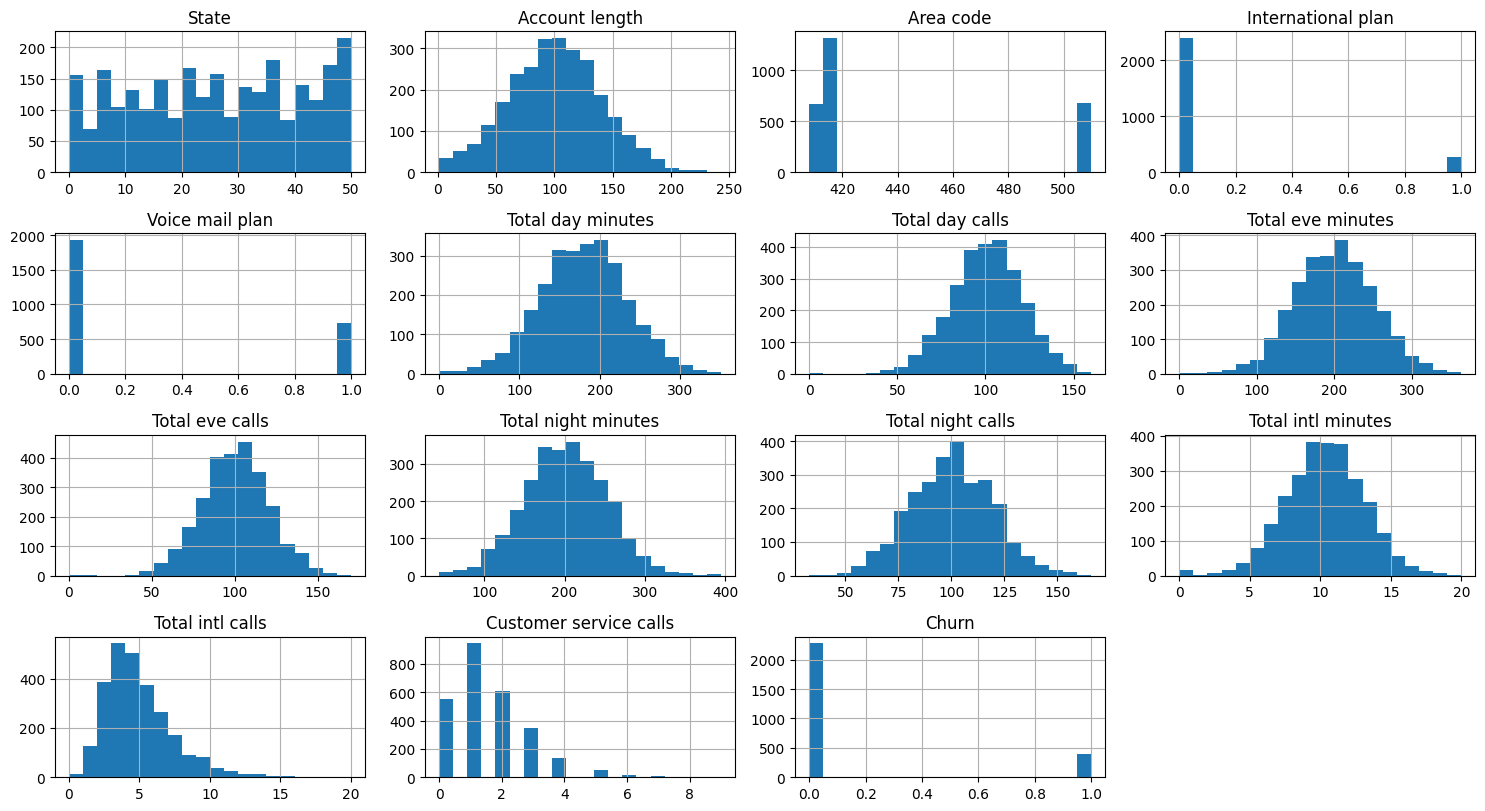

In [ ]:
#Visualize Feature Distributions
data_train.hist(bins=20, figsize=(15, 10), layout=(5, 4))
plt.tight_layout()
plt.show()


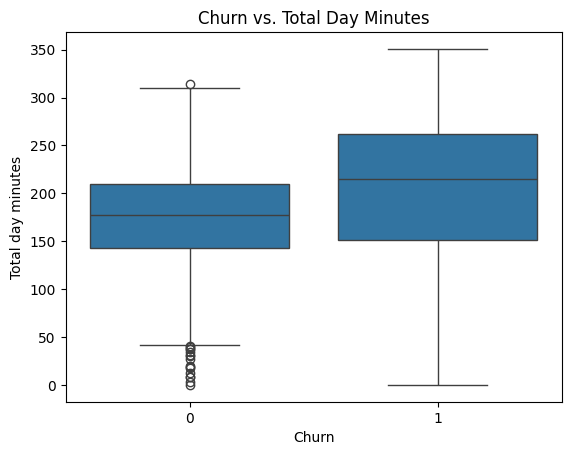

In [ ]:
#Analyze Target Relationships
sns.boxplot(x='Churn', y='Total day minutes', data=data_train)
plt.title('Churn vs. Total Day Minutes')
plt.show()


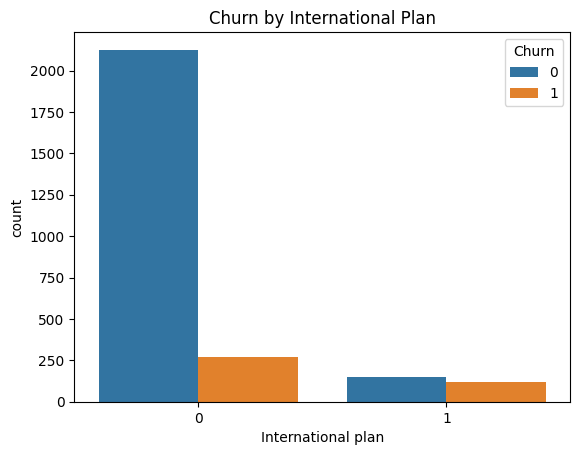

In [ ]:
#Analyze Target Relationships
sns.countplot(x='International plan', hue='Churn', data=data_train)
plt.title('Churn by International Plan')
plt.show()


In [ ]:
X = data_train.drop(columns=['Churn'])  # Features
y = data_train['Churn']

In [ ]:
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

X_test = data_test.drop('Churn', axis=1)
y_test = data_test['Churn']


In [ ]:
# Best model from grid search
#best_model = grid_search.best_estimator_

**Train**


In [ ]:
# Train a Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42,max_depth=5)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
 #Track accuracy and loss for train and validation
train_accuracy = []
val_accuracy = []
train_loss = []
val_loss = []

lb = LabelBinarizer()
y_train_bin = lb.fit_transform(y_train)
y_val_bin = lb.transform(y_val)

for i in range(1, 5):
    dt_model = DecisionTreeClassifier(max_depth=i, random_state=42)
    dt_model.fit(X_train, y_train)
    train_accuracy.append(dt_model.score(X_train, y_train))
    val_accuracy.append(dt_model.score(X_val, y_val))
    train_loss.append(log_loss(y_train_bin, dt_model.predict_proba(X_train)))
    val_loss.append(log_loss(y_val_bin, dt_model.predict_proba(X_val)))


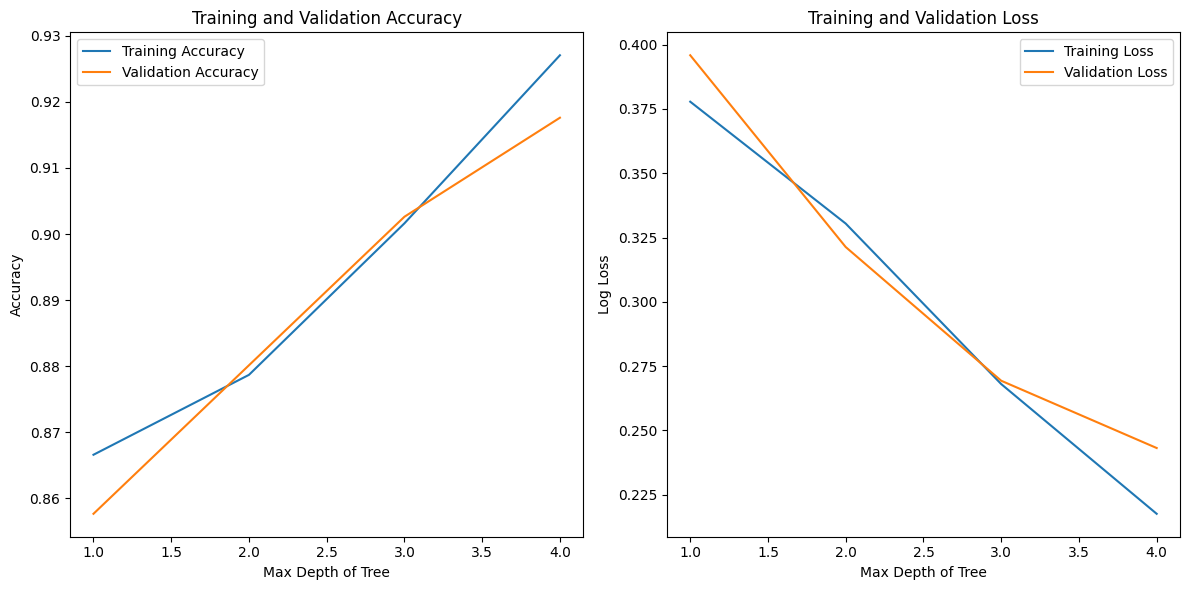

In [ ]:
# Plot accuracy and loss for train and validation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, 5), train_accuracy, label='Training Accuracy')
plt.plot(range(1, 5), val_accuracy, label='Validation Accuracy')
plt.xlabel('Max Depth of Tree')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, 5), train_loss, label='Training Loss')
plt.plot(range(1, 5), val_loss, label='Validation Loss')
plt.xlabel('Max Depth of Tree')
plt.ylabel('Log Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Make predictions on validation set
y_val_pred = dt_model.predict(X_val)
print("Validation Set Evaluation:")
print(classification_report(y_val, y_val_pred))

Validation Set Evaluation:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       225
           1       0.88      0.55      0.68        42

    accuracy                           0.92       267
   macro avg       0.90      0.77      0.81       267
weighted avg       0.92      0.92      0.91       267



In [ ]:
# Make predictions on test set
y_test_pred = dt_model.predict(X_test)

In [ ]:
# Evaluate the model on test set
print("Test Set Evaluation:")
print(classification_report(y_test, y_test_pred))

Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       572
           1       0.90      0.59      0.71        95

    accuracy                           0.93       667
   macro avg       0.92      0.79      0.84       667
weighted avg       0.93      0.93      0.93       667



In [ ]:
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_test_pred)
print(conf_matrix)

Confusion Matrix:
[[566   6]
 [ 39  56]]


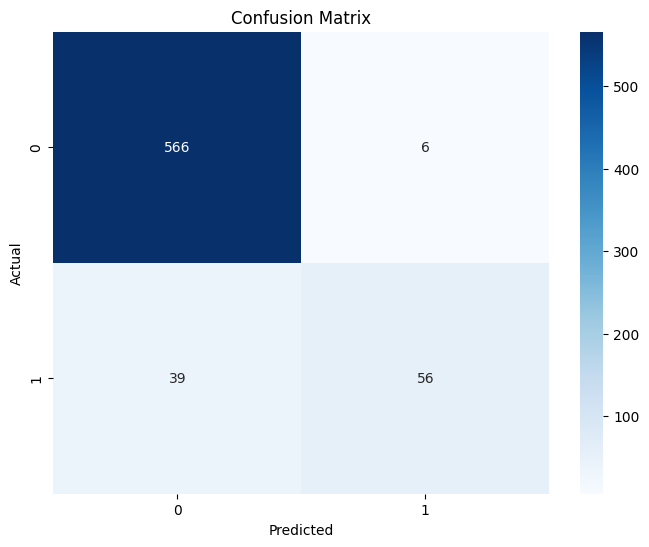

In [ ]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

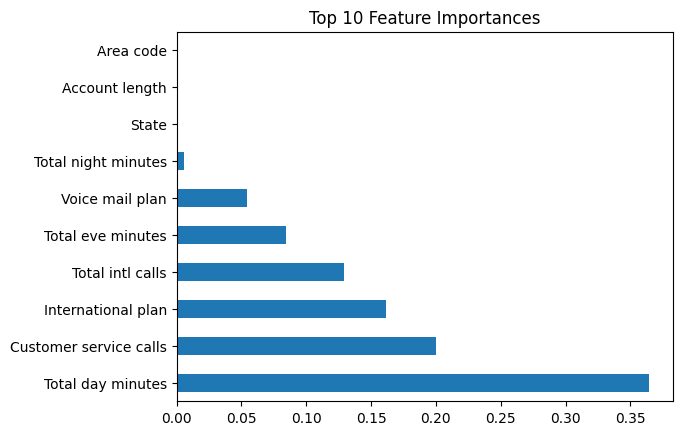

In [ ]:
# Feature importance
feature_importance = pd.Series(dt_model.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()

In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.93


Random forest code

In [ ]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)


Training set shape: (2399, 14) (2399,)
Validation set shape: (267, 14) (267,)


In [ ]:
#confirm class distribution in the validation set to ensure proportional representation
print("Class distribution in validation set:")
print(y_val.value_counts(normalize=True))


Class distribution in validation set:
Churn
0    0.842697
1    0.157303
Name: proportion, dtype: float64


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Train the Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Training Accuracy: 1.0000
Validation Accuracy: 0.9476


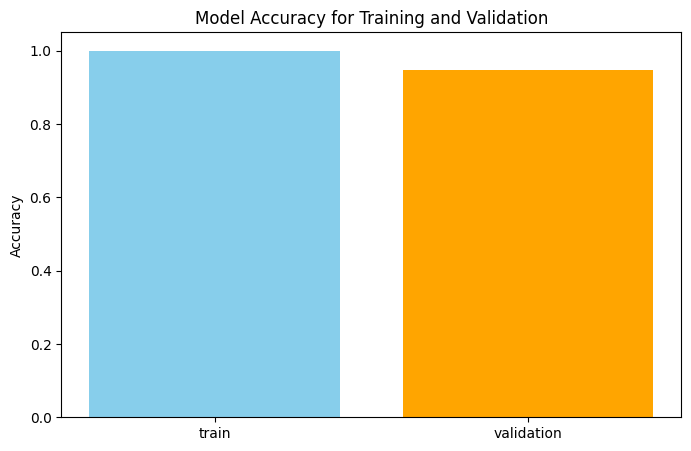

In [ ]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Evaluate accuracy for training data
y_train_pred = rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Evaluate accuracy for validation data
y_val_pred = rf_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Track accuracy
accuracy = {"train": train_accuracy, "validation": val_accuracy}
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Plot accuracy for training and validation
plt.figure(figsize=(8, 5))
plt.bar(accuracy.keys(), accuracy.values(), color=['skyblue', 'orange'])
plt.title('Model Accuracy for Training and Validation')
plt.ylabel('Accuracy')
plt.show()


In [ ]:
# Validate the model
y_val_pred = rf_model.predict(X_val)

# Evaluate performance
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Classification Report:")
print(classification_report(y_val, y_val_pred))

Validation Accuracy: 0.947565543071161
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       225
           1       0.97      0.69      0.81        42

    accuracy                           0.95       267
   macro avg       0.96      0.84      0.89       267
weighted avg       0.95      0.95      0.94       267



In [ ]:
#confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

Confusion Matrix:
[[222   3]
 [ 19  23]]


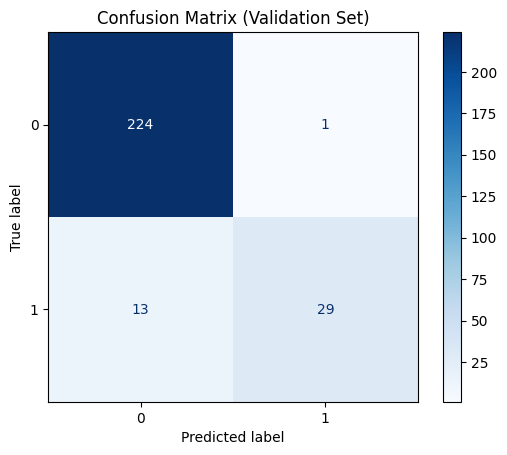

In [ ]:
cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Validation Set)")
plt.show()

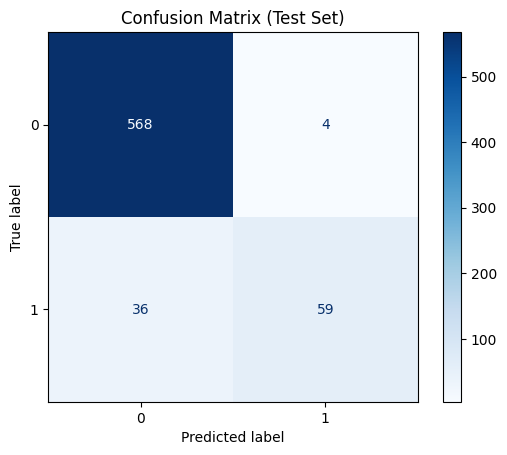

In [ ]:
# Confusion Matrix for Test Set
y_test_pred = rf_model.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=rf_model.classes_)
disp_test.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Test Set)")
plt.show()


In [ ]:
# Predict on the test set
y_test_pred = rf_model.predict(X_test)

# Evaluate performance on test data
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

# Optional: Confusion Matrix for Test Data
print("Confusion Matrix (Test Data):")
print(confusion_matrix(y_test, y_test_pred))


Test Accuracy: 0.9400299850074962
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       572
           1       0.94      0.62      0.75        95

    accuracy                           0.94       667
   macro avg       0.94      0.81      0.86       667
weighted avg       0.94      0.94      0.93       667

Confusion Matrix (Test Data):
[[568   4]
 [ 36  59]]


In [ ]:
#Features importance
feature_importances = rf_model.feature_importances_
feature_names = X_train.columns
sorted_features = sorted(zip(feature_importances, feature_names), reverse=True)
print("Feature Importances:")
for importance, name in sorted_features:
    print(f"{name}: {importance:.4f}")


Feature Importances:
Total day minutes: 0.2196
Customer service calls: 0.1165
International plan: 0.0967
Total eve minutes: 0.0921
Total intl minutes: 0.0797
Total intl calls: 0.0605
Total night minutes: 0.0578
Total day calls: 0.0526
Account length: 0.0512
Total night calls: 0.0468
Total eve calls: 0.0452
State: 0.0435
Voice mail plan: 0.0233
Area code: 0.0146


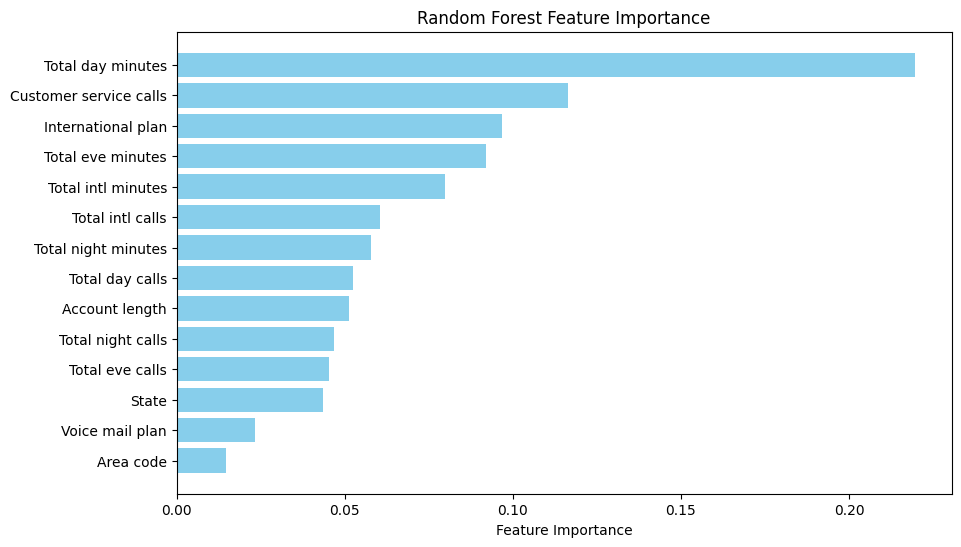

In [ ]:
# Get feature importance from the Random Forest model
feature_importances = rf_model.feature_importances_
feature_names = X_train.columns

# Sort feature importance in descending order
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_feature_names = feature_names[sorted_idx]
sorted_importances = feature_importances[sorted_idx]

# Visualize the feature importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display highest importance on top
plt.show()


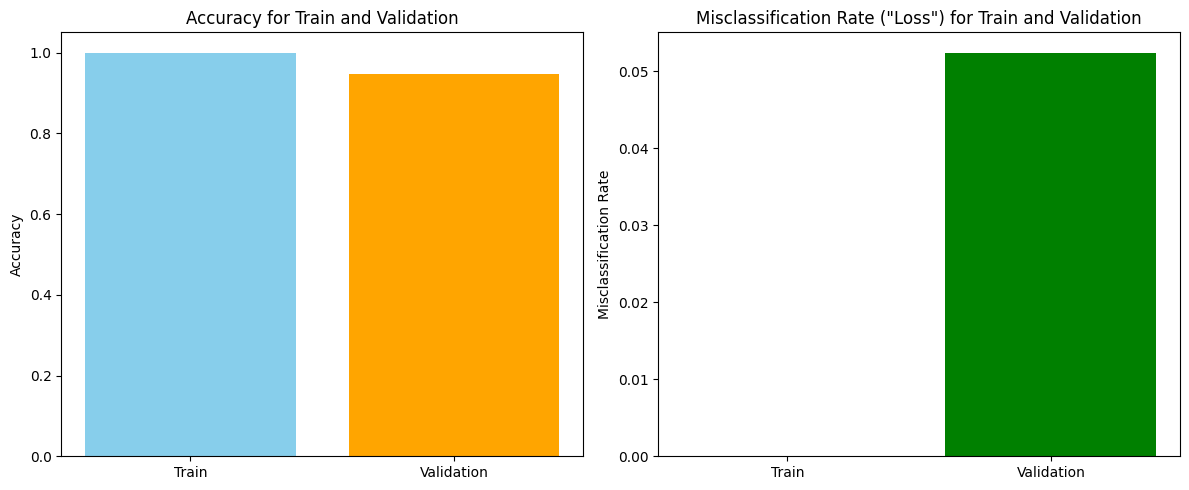

In [ ]:
# Misclassification rate as proxy for "loss"
train_loss = 1 - train_accuracy
val_loss = 1 - val_accuracy

# Plot accuracy and "loss" for train and validation
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.bar(['Train', 'Validation'], [train_accuracy, val_accuracy], color=['skyblue', 'orange'])
plt.title('Accuracy for Train and Validation')
plt.ylabel('Accuracy')

# Loss
plt.subplot(1, 2, 2)
plt.bar(['Train', 'Validation'], [train_loss, val_loss], color=['red', 'green'])
plt.title('Misclassification Rate ("Loss") for Train and Validation')
plt.ylabel('Misclassification Rate')

plt.tight_layout()
plt.show()
